<a href="https://colab.research.google.com/github/Azka-Yasin/Breast_Cancer_Project_20s20041/blob/main/21Jan_ddsm_sh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    confusion_matrix,
    precision_score,
    recall_score,
    classification_report,
)
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [ ]:
#Preprocess images using ImageDataGenerator
def preprocessing_images(path, augmentation=False):
    if augmentation:
        image_data = ImageDataGenerator(
            zoom_range=0.2,
            shear_range=0.2,
            rescale=1/255,
            horizontal_flip=True,
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            fill_mode='nearest'
        )
    else:
        image_data = ImageDataGenerator(rescale=1/255)

    image_generator = image_data.flow_from_directory(
        directory=path,
        target_size=(227, 227),
        batch_size=32,
        class_mode='binary'
    )

    return image_generator


# Specify paths
train_path = r"/content/drive/MyDrive/DDSM/train"
test_path = r"/content/drive/MyDrive/DDSM/test"
val_path = r"/content/drive/MyDrive/DDSM/val"

# Data augmentation for training but not for validation set
train_data = preprocessing_images(train_path, augmentation=True)
val_data = preprocessing_images(val_path, augmentation=False)

Found 8433 images belonging to 2 classes.
Found 1808 images belonging to 2 classes.


In [ ]:
# Model definition
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(227, 227, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Model checkpoint
mc = ModelCheckpoint(
    monitor="val_accuracy",
    filepath="./21jan-ddsm-bestmodel.h5",
    verbose=1,
    save_best_only=True,
    mode='auto',
    save_freq='epoch'
)

# Learning rate scheduler function
def lr_schedule(epoch):
    learning_rate = 1e-4
    if epoch > 30:
        learning_rate *= 1e-1
    return learning_rate
# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Training
history = model.fit(
    train_data,
    steps_per_epoch=264,
    epochs=50,
    verbose=1,
    validation_data=val_data,
    validation_steps=57,
    callbacks=[mc, lr_scheduler]
)

Epoch 1/50
264/264 [==============================] - ETA: 0s - loss: 0.9692 - accuracy: 0.6218
Epoch 1: val_accuracy improved from -inf to 0.50055, saving model to ./21jan-ddsm-bestmodel.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


264/264 [==============================] - 2166s 8s/step - loss: 0.9692 - accuracy: 0.6218 - val_loss: 4.3991 - val_accuracy: 0.5006 - lr: 1.0000e-04
Epoch 2/50
264/264 [==============================] - ETA: 0s - loss: 0.4616 - accuracy: 0.7742
Epoch 2: val_accuracy improved from 0.50055 to 0.72732, saving model to ./21jan-ddsm-bestmodel.h5
264/264 [==============================] - 121s 460ms/step - loss: 0.4616 - accuracy: 0.7742 - val_loss: 0.5820 - val_accuracy: 0.7273 - lr: 1.0000e-04
Epoch 3/50
264/264 [==============================] - ETA: 0s - loss: 0.3752 - accuracy: 0.8298
Epoch 3: val_accuracy improved from 0.72732 to 0.95852, saving model to ./21jan-ddsm-bestmodel.h5
264/264 [==============================] - 123s 467ms/step - loss: 0.3752 - accuracy: 0.8298 - val_loss: 0.1454 - val_accuracy: 0.9585 - lr: 1.0000e-04
Epoch 4/50
264/264 [==============================] - ETA: 0s - loss: 0.3545 - accuracy: 0.8477
Epoch 4: val_accuracy did not improve from 0.95852
264/264 [==

In [ ]:
# Save the best model
model.save("/content/21jan-ddsm-bestmodel.h5")

# Download the best model
files.download("/content/21jan-ddsm-bestmodel.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

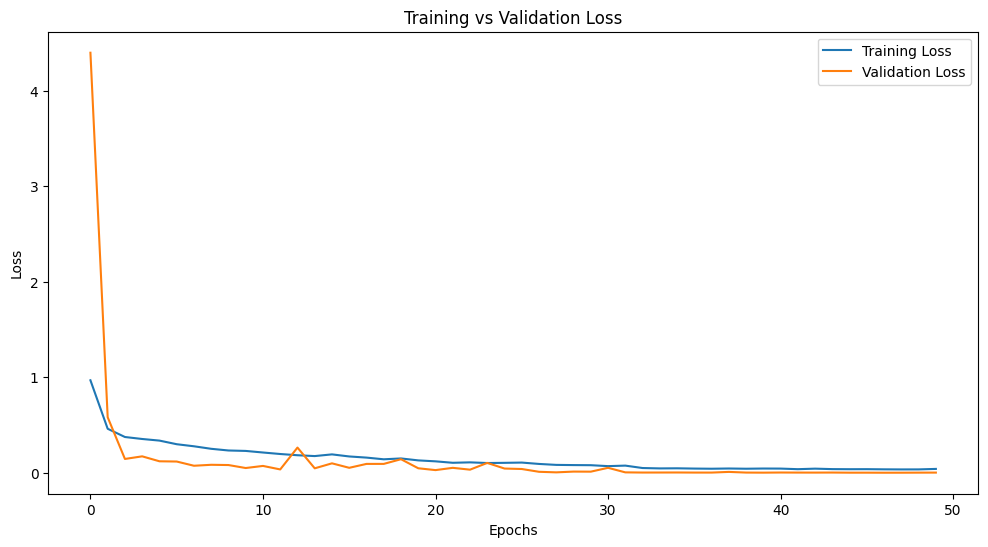

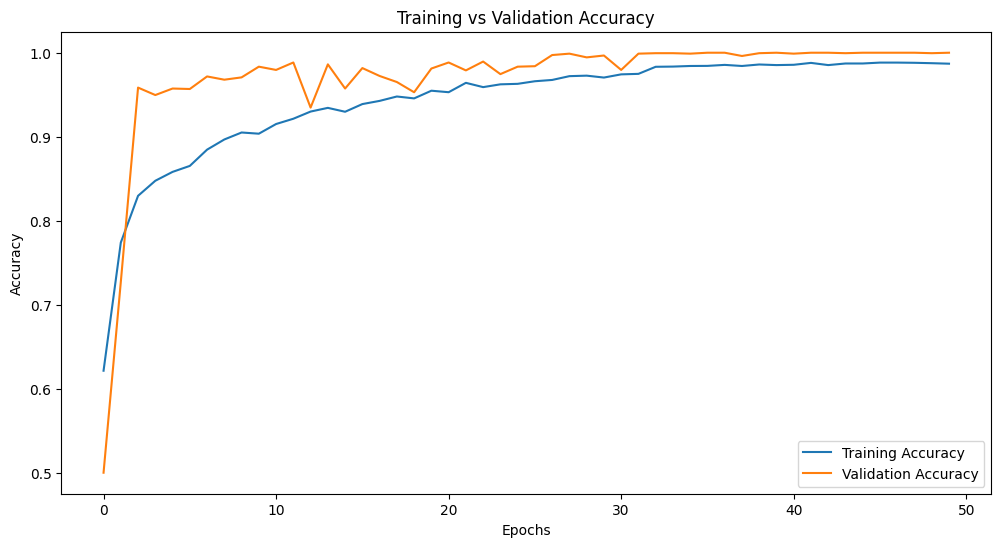

In [ ]:
# Visualizations
# Training vs Validation Loss Graph
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("/content/drive/MyDrive/DDSM/training_vs_validation_loss_21j.png")
plt.show()

# Learning Curve
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("/content/drive/MyDrive/DDSM/training_vs_validation_accuracy_21j.png")
plt.show()

In [ ]:
# Load the best model
model = load_model("/content/21jan-ddsm-bestmodel.h5")

Found 1807 images belonging to 2 classes.
57/57 [==============================] - 7s 116ms/step

Metrics:
Accuracy: 0.9994
Precision: 0.9989
Recall: 1.0000
F1 Score: 0.9995
AUC-ROC: 1.0000
Confusion Matrix:
[[894   1]
 [  0 912]]
Classification Report:
              precision    recall  f1-score   support

      benign       1.00      1.00      1.00       895
   malignant       1.00      1.00      1.00       912

    accuracy                           1.00      1807
   macro avg       1.00      1.00      1.00      1807
weighted avg       1.00      1.00      1.00      1807



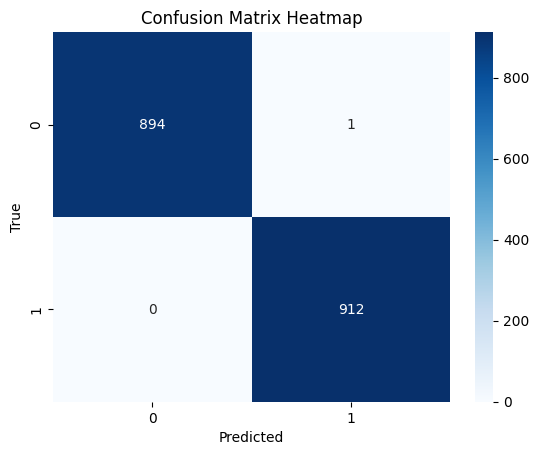

In [ ]:
# Evaluation on the Test Set
# Create an ImageDataGenerator for rescaling
test_data = ImageDataGenerator(rescale=1 / 255)

test_generator = test_data.flow_from_directory(
    directory=test_path,
    target_size=(227, 227),
    batch_size=32,
    class_mode=None,  # Set to None for the test set
    shuffle=False
)

# Calculate the number of steps for evaluation
test_steps = int(np.ceil(test_generator.samples / test_generator.batch_size))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_steps)

# Predictions
y_pred = model.predict(test_generator, steps=test_steps)
y_true = test_generator.classes.astype(float)

# Metrics
accuracy = accuracy_score(y_true, np.round(y_pred))
precision = precision_score(y_true, np.round(y_pred))
recall = recall_score(y_true, np.round(y_pred))
f1 = f1_score(y_true, np.round(y_pred))
auc_roc = metrics.roc_auc_score(y_true, y_pred)

print("\nMetrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, np.round(y_pred))
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_true, np.round(y_pred), target_names=['benign', 'malignant'])
print("Classification Report:")
print(class_report)

# Heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



In [ ]:
#--------------------------------------------------------------------------

In [ ]:
#native Keras format
model.save('22jan-mias-bestmodel.keras')
# Specify the path to the saved model file
model_path2 = "22jan-mias-bestmodel.keras"

# Trigger the download of the file
files.download(model_path2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Found 100 images belonging to 2 classes.
4/4 [==============================] - 1s 231ms/step

Metrics:
Accuracy: 0.4900
Precision: 0.4762
Recall: 0.2000
F1 Score: 0.2817
AUC-ROC: 0.4612
Confusion Matrix:
[[39 11]
 [40 10]]
Classification Report:
              precision    recall  f1-score   support

      benign       0.49      0.78      0.60        50
   malignant       0.48      0.20      0.28        50

    accuracy                           0.49       100
   macro avg       0.48      0.49      0.44       100
weighted avg       0.48      0.49      0.44       100



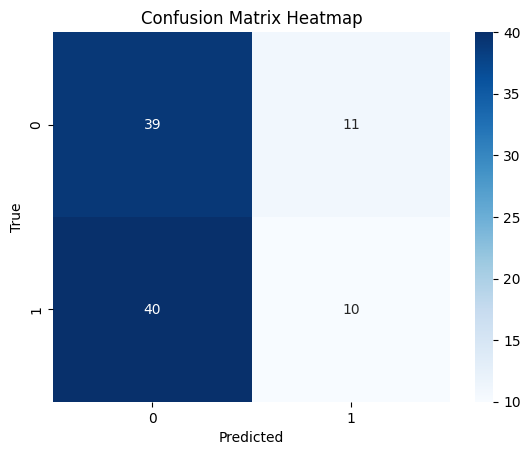

In [10]:
#testing sharjah dataset
test_data = ImageDataGenerator(rescale=1 / 255)

test_generator = test_data.flow_from_directory(
    directory="/content/drive/MyDrive/sharjah dataset/version 1/combined for 21J",
    target_size=(227, 227),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

# Calculate the number of steps for evaluation
test_steps = int(np.ceil(test_generator.samples / test_generator.batch_size))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_steps)

# Predictions
y_pred = model.predict(test_generator, steps=test_steps)
y_true = test_generator.classes.astype(float)

# Metrics
accuracy = accuracy_score(y_true, np.round(y_pred))
precision = precision_score(y_true, np.round(y_pred))
recall = recall_score(y_true, np.round(y_pred))
f1 = f1_score(y_true, np.round(y_pred))
auc_roc = metrics.roc_auc_score(y_true, y_pred)

print("\nMetrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, np.round(y_pred))
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_true, np.round(y_pred), target_names=['benign', 'malignant'])
print("Classification Report:")
print(class_report)

# Heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

